# Loading libraries and data file

In [142]:
import os
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [143]:
#loading the file
br_day = pd.read_csv('E:/Project/Bike rental/bike_rental_day.csv')

In [144]:
br_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [145]:
#checking the data set
br_day.shape

(731, 16)

In [146]:
br_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [147]:
br_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Checking missing Values in dataset

In [148]:
#Checking if any NA are there or not
br_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [149]:
#We can clearly see there are no missing values.

In [150]:
br_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [151]:
br_day.shape

(731, 16)

In [152]:
#Here we are removing few variables. instant has no information as it is record index. dteday has no meaning to us here
#as we are focusing on seasonal setting not dates of month or of year. yr variable also has no importance here. As we are
#interested in finding total count i.e. variable  cnt which is our target variable and it is sum of casual and registered so 
#we will remove casual and registerd variable also. 

br_day_subset = pd.DataFrame(br_day[['season','mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp',
                                    'hum','windspeed','cnt']])

In [153]:
br_day_subset.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Outlier Analysis

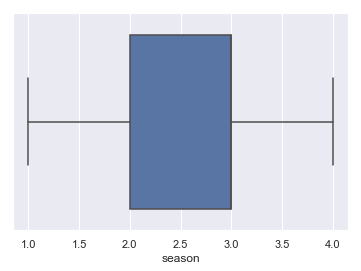

In [106]:
sns.boxplot(br_day_subset['season'])

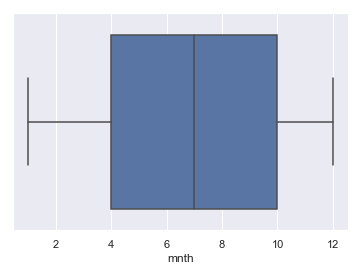

In [404]:
sns.boxplot(br_day_subset['mnth'])

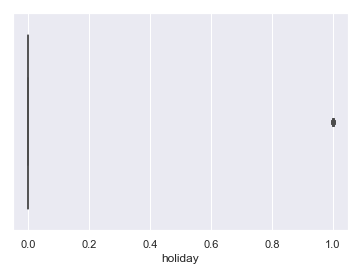

In [405]:
sns.boxplot(br_day_subset['holiday'])

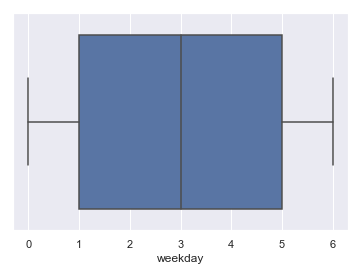

In [406]:
sns.boxplot(br_day_subset['weekday'])

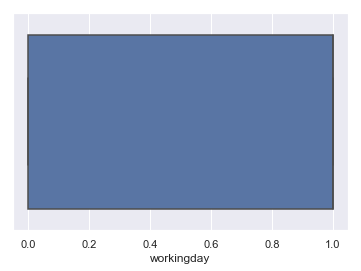

In [407]:
sns.boxplot(br_day_subset['workingday'])

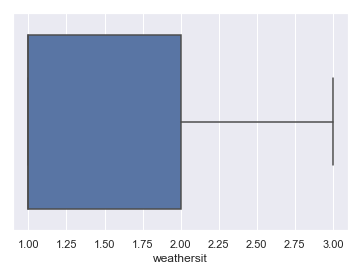

In [408]:
sns.boxplot(br_day_subset['weathersit'])

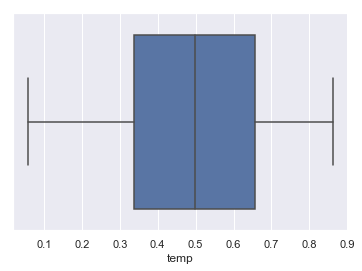

In [409]:
sns.boxplot(br_day_subset['temp'])

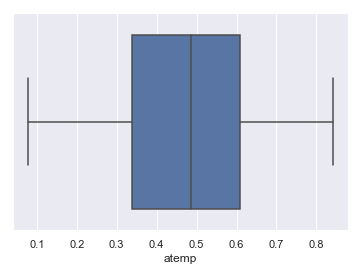

In [410]:
sns.boxplot(br_day_subset['atemp'])

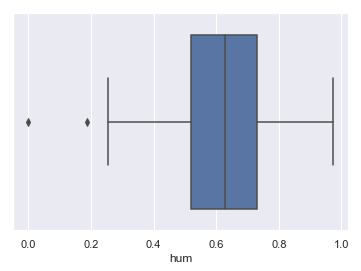

In [154]:
sns.boxplot(br_day_subset['hum'])

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


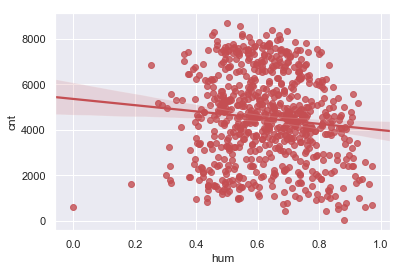

In [155]:
sns.regplot(x = 'hum', y = 'cnt', data = br_day_subset, color = 'r')

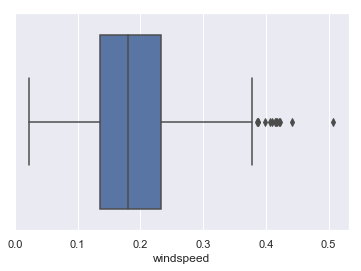

In [156]:
sns.boxplot(br_day_subset['windspeed'])

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


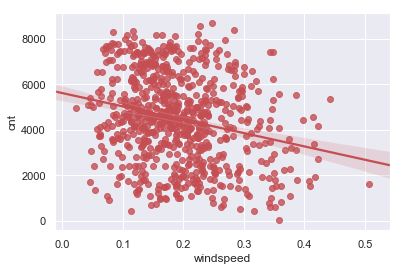

In [157]:
sns.regplot(x = 'windspeed' , y = 'cnt', data = br_day_subset, color = 'r')

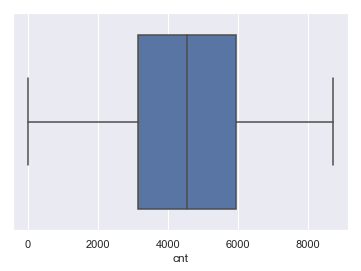

In [413]:
sns.boxplot(br_day_subset['cnt'])

In [414]:
#From above boxplots we can clearly see that there are outliers present in variable hum and wind speed. So here we are deleting
#outliers.

In [158]:
#making copy of data set
df = br_day_subset.copy()

In [159]:
cnames = ['hum', 'windspeed']

In [160]:
#Detecting and deleting outlier from data using boxplot method
for i in cnames:
    print(i)
    q75,q25 = np.percentile(br_day_subset.loc[:,i],[75,25])
    
    iqr = q75-q25
    
    min = q25-(iqr*1.5)
    max = q75+(iqr*1.5)
    print(min)
    print(max)
    
    br_day_subet = br_day_subset.drop(br_day_subset[br_day_subset.loc[:,i]<min].index)
    br_day_subset = br_day_subset.drop(br_day_subset[br_day_subset.loc[:,i]>max].index)

hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


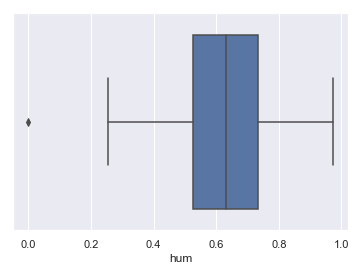

In [161]:
#boxplot after deleting outlier
sns.boxplot(br_day_subset['hum'])

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


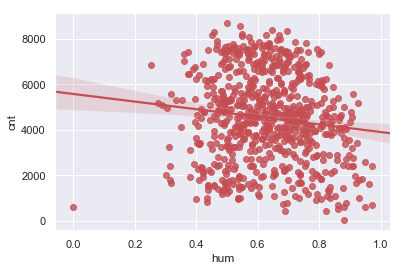

In [162]:
sns.regplot(x = 'hum' , y = 'cnt', data = br_day_subset, color = 'r')

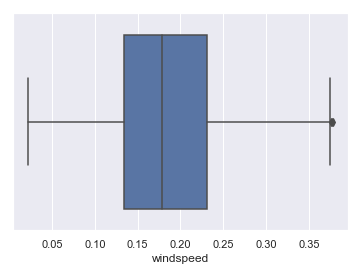

In [163]:
sns.boxplot(br_day_subset['windspeed'])

In [18]:
br_day_subset.shape

(718, 11)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


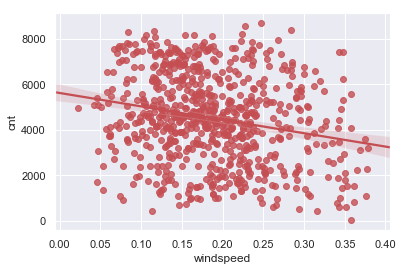

In [164]:
sns.regplot(x = 'windspeed' , y = 'cnt', data = br_day_subset, color = 'r')

In [19]:
#Loading data set again
br_day_subset = df.copy()

In [20]:
br_day_subset.shape

(731, 11)

In [21]:
br_day_subset.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [424]:
#Checking distribution o variables with help of histogram

Text(0.5,0,'season')

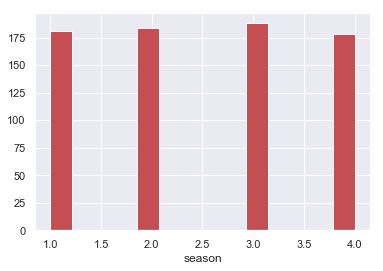

In [425]:
#Checking distribution of season variable
sns.set()
plt.hist(br_day_subset['season'], bins = 'auto', color = 'r')
plt.xlabel('season')

Text(0.5,0,'mnth')

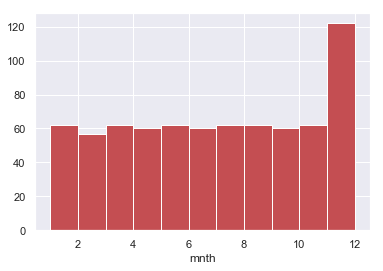

In [426]:
#Checking the distribution of mnth variable
plt.hist(br_day['mnth'], bins = 'auto', color = 'r')
plt.xlabel('mnth')

Text(0.5,0,'holiday')

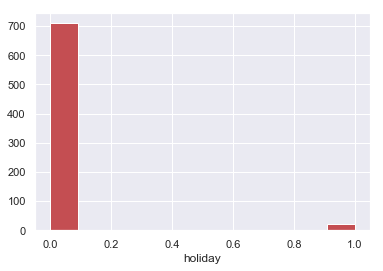

In [427]:
#Checking the distribution of holiday variable
plt.hist(br_day['holiday'], bins = 'auto', color = 'r')
plt.xlabel('holiday')

(array([105., 105.,   0., 104.,   0., 104.,   0., 104.,   0., 104., 105.]),
 array([0.        , 0.54545455, 1.09090909, 1.63636364, 2.18181818,
        2.72727273, 3.27272727, 3.81818182, 4.36363636, 4.90909091,
        5.45454545, 6.        ]),
 <a list of 11 Patch objects>)

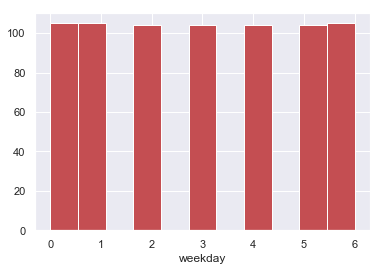

In [428]:
#Checking the distribution of weekday variable
plt.xlabel('weekday')
plt.hist(br_day['weekday'], bins = 'auto', color = 'r')

(array([231.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 <a list of 11 Patch objects>)

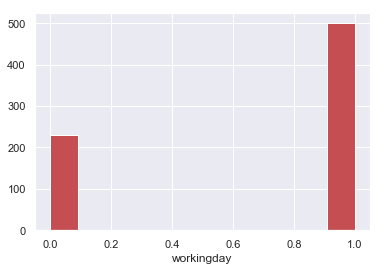

In [429]:
#Checking the distribution of workingday variable
plt.xlabel('workingday')
plt.hist(br_day['workingday'], bins = 'auto', color = 'r')

(array([463.,   0.,   0.,   0.,   0., 247.,   0.,   0.,   0.,   0.,  21.]),
 array([1.        , 1.18181818, 1.36363636, 1.54545455, 1.72727273,
        1.90909091, 2.09090909, 2.27272727, 2.45454545, 2.63636364,
        2.81818182, 3.        ]),
 <a list of 11 Patch objects>)

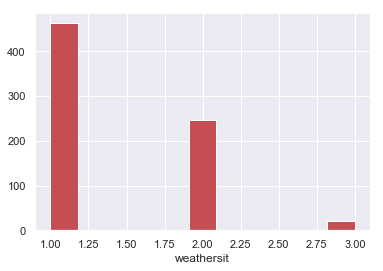

In [430]:
#Checking the distribution of weathersit variable
plt.xlabel('weathersit')
plt.hist(br_day['weathersit'], bins = 'auto', color = 'r')

(array([ 4., 24., 45., 97., 84., 76., 61., 76., 91., 94., 63., 16.]),
 array([0.0591304 , 0.12600845, 0.1928865 , 0.25976455, 0.3266426 ,
        0.39352065, 0.4603987 , 0.52727675, 0.5941548 , 0.66103285,
        0.7279109 , 0.79478895, 0.861667  ]),
 <a list of 12 Patch objects>)

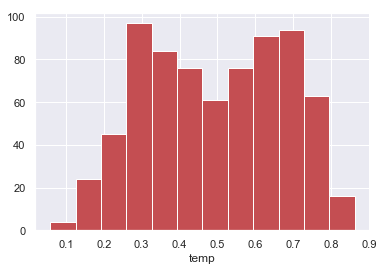

In [431]:
#Checking distribution of temp variable
plt.xlabel('temp')
plt.hist(br_day['temp'], bins = 'auto', color= 'r')

(array([ 7., 20., 45., 75., 79., 77., 65., 85., 89., 95., 62., 24.,  8.]),
 array([0.0790696 , 0.13767163, 0.19627366, 0.25487569, 0.31347772,
        0.37207975, 0.43068178, 0.48928382, 0.54788585, 0.60648788,
        0.66508991, 0.72369194, 0.78229397, 0.840896  ]),
 <a list of 13 Patch objects>)

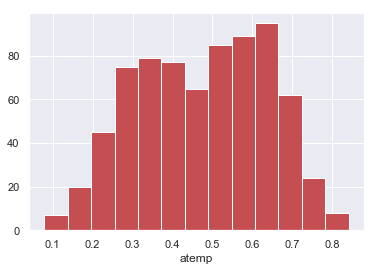

In [432]:
#Checking distribution of atemp variable
plt.xlabel('atemp')
plt.hist(br_day['atemp'], bins = 'auto', color = 'r')

(array([ 1.,  0.,  0.,  0.,  1.,  2.,  8.,  5., 28., 41., 86., 71., 81.,
        79., 85., 81., 57., 45., 28., 24.,  8.]),
 array([0.        , 0.04630952, 0.09261905, 0.13892857, 0.1852381 ,
        0.23154762, 0.27785714, 0.32416667, 0.37047619, 0.41678571,
        0.46309524, 0.50940476, 0.55571429, 0.60202381, 0.64833333,
        0.69464286, 0.74095238, 0.7872619 , 0.83357143, 0.87988095,
        0.92619048, 0.9725    ]),
 <a list of 21 Patch objects>)

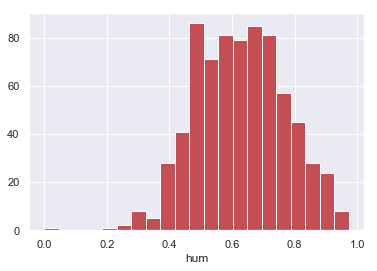

In [433]:
#Checking distribution of hum variable
plt.xlabel('hum')
plt.hist(br_day['hum'], bins = 'auto', color = 'r')

(array([ 2., 18., 31., 38., 67., 86., 84., 87., 62., 74., 51., 30., 30.,
        18., 10., 22.,  8.,  4.,  7.,  1.,  0.,  0.,  1.]),
 array([0.0223917 , 0.04348176, 0.06457181, 0.08566187, 0.10675193,
        0.12784198, 0.14893204, 0.1700221 , 0.19111215, 0.21220221,
        0.23329227, 0.25438232, 0.27547238, 0.29656243, 0.31765249,
        0.33874255, 0.3598326 , 0.38092266, 0.40201272, 0.42310277,
        0.44419283, 0.46528289, 0.48637294, 0.507463  ]),
 <a list of 23 Patch objects>)

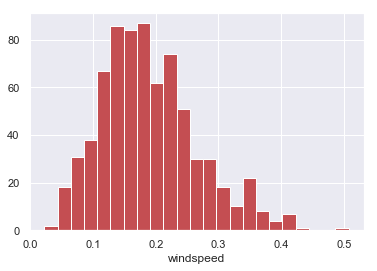

In [434]:
#Checking distribution of windspeed variable
plt.xlabel('windspeed')
plt.hist(br_day['windspeed'], bins = 'auto', color = 'r')

Text(0.5,0,'cnt')

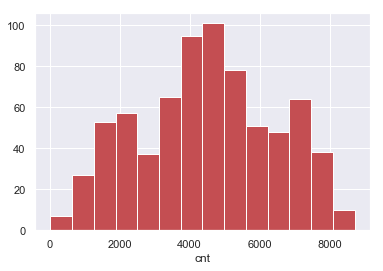

In [75]:
#Checking distribution of windspeed variable
plt.hist(br_day_subset['cnt'], bins = 'auto', color = 'r')
plt.xlabel('cnt')

# Feature selection

In [22]:
####Feature selection
cnames = ['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']

In [23]:
br_corr = br_day_subset.loc[:,cnames]

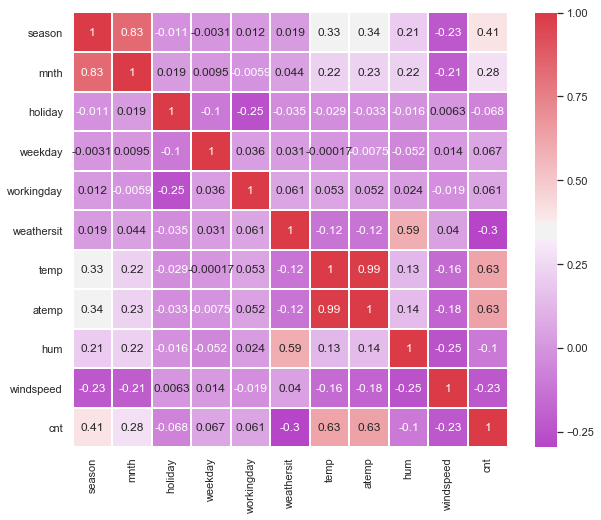

In [24]:
f, ax = plt.subplots(figsize=(10,8))

corr_matrix = br_corr.corr()

sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype=np.bool), cmap = sns.diverging_palette(300,10, as_cmap= True),
            annot = True , linewidths = 0.9,square = True, ax=ax)

In [438]:
#From above correlation plot we can clearly see that there is a high correlation between season and mnth, temp and atemp,
#weathersit and hum So we will drop mnth,temp and hum. Our variables for study will be season,weekday,workingday,weathersit,
#atemp,windspeed and cnt.

In [439]:
##Plotting regression scattered plot to see positive or negative relation of variables with target variable

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


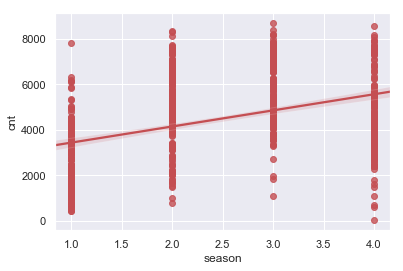

In [440]:
sns.regplot(x = 'season', y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


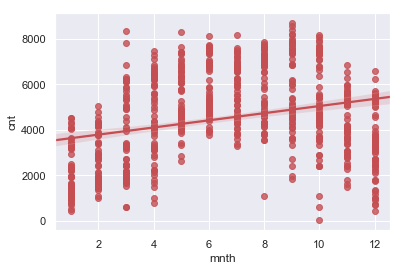

In [441]:
sns.regplot(x = 'mnth' , y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


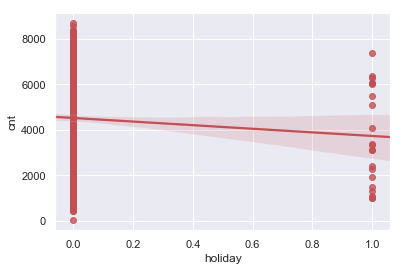

In [442]:
sns.regplot(x = 'holiday' , y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


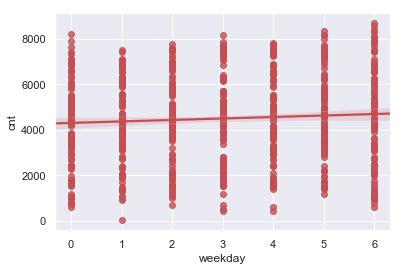

In [443]:
sns.regplot(x = 'weekday', y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


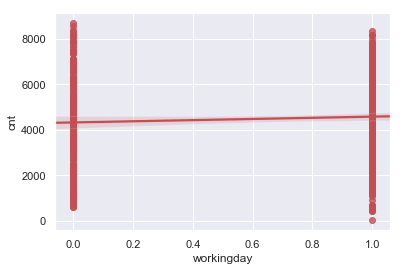

In [444]:
sns.regplot(x= 'workingday' , y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


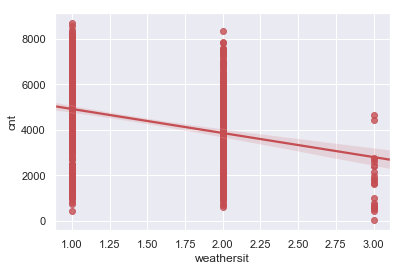

In [368]:
sns.regplot(x = 'weathersit' , y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


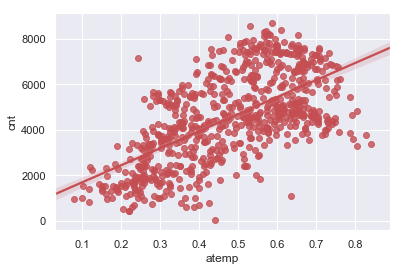

In [369]:
sns.regplot(x = 'atemp' , y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


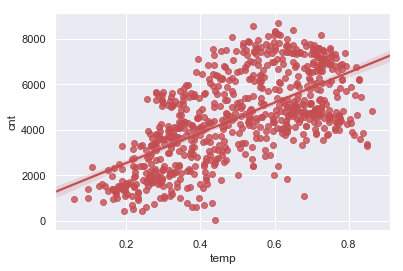

In [374]:
sns.regplot(x= 'temp', y = 'cnt',  data= br_day_subset,  color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


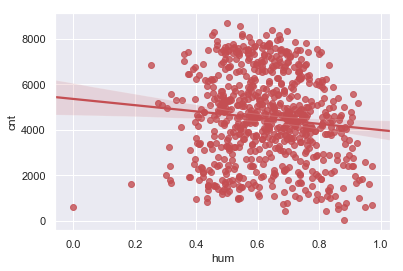

In [372]:
sns.regplot(x = 'hum' , y = 'cnt', data = br_day_subset, color = 'r')

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


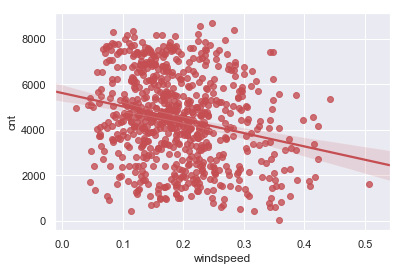

In [373]:
sns.regplot(x= 'windspeed', y = 'cnt',  data= br_day_subset,  color = 'r')

In [445]:
br_day.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [33]:
#here we are not considering instant as it is like sr. no. dteday here does not hold useful information here as we are interested
# in season based. casual and registered we will not consider as we are interested in total count i.e. sum o casual and registered
#So the total count is present in cnt variable which will be our target variable.

#After plotting correlation plot and scatter plot with regression line we can see se there are few variables which high 
#correlation between themselves and there are few variables which have negative correlation with target variable. 
#So we will select final variables for implementation of MLA.


In [131]:
br_sliced = pd.DataFrame(br_day_subset[['season','holiday','weekday','workingday','weathersit','atemp','windspeed', 'cnt']])

In [132]:
#Calculate MAPE ## We have defined a function here
## y_true --- actual value
## y_pred --- predicted value
## abs means absolute value. It rounds up the value to whole number
def MAPE(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    return mape

In [55]:
br_sliced.head(5)

,season,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt
0,1,0,6,0,2,0.363625,0.160446,985
1,1,0,0,0,2,0.353739,0.248539,801
2,1,0,1,1,1,0.189405,0.248309,1349
3,1,0,2,1,1,0.212122,0.160296,1562
4,1,0,3,1,1,0.229270,0.186900,1600


In [31]:
br_sliced.describe()

,season,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.028728,2.997264,0.683995,1.395349,0.474354,0.190486,4504.348837
std,1.110807,0.167155,2.004787,0.465233,0.544894,0.162961,0.077498,1937.211452
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.079070,0.022392,22.000000
25%,2.000000,0.000000,1.000000,0.000000,1.000000,0.337842,0.134950,3152.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,0.486733,0.180975,4548.000000
75%,3.000000,0.000000,5.000000,1.000000,2.000000,0.608602,0.233214,5956.000000
max,4.000000,1.000000,6.000000,1.000000,3.000000,0.840896,0.507463,8714.000000


In [32]:
#############Decision Tree Regressor#############
#select subset using stratified Sampling
y = br_sliced['season']
train, test = train_test_split(br_sliced, test_size = 0.2, stratify = y)

In [33]:
train.shape

(584, 8)

In [34]:
test.shape

(147, 8)

In [45]:
br_fit_DT = DecisionTreeRegressor(max_depth =5).fit(train.iloc[:,0:7], train.iloc[:,7])

In [46]:
#Apply above model on test data
prediction_DT = br_fit_DT.predict(test.iloc[:,0:7])

In [47]:
MAPE(test.iloc[:,7],prediction_DT)

27.901736841891445

In [115]:
#the error is 27.90% which means our model is 72.1% accurate when max depth is 5


In [56]:
df=br_sliced.copy()

In [57]:
#Dividing data into train and test
X = br_sliced.values[:, 0:7]
Y = br_sliced.values[:,7]
a = br_sliced['season']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, stratify = a)

In [62]:
#Random Forest
RF_model = RandomForestRegressor(n_estimators = 500, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", 
                                  min_samples_leaf = 50).fit(X_train, y_train)


In [63]:
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=50, verbose=0, warm_start=False)

In [64]:
RF_prediction = RF_model.predict(X_test)

In [65]:
MAPE(y_test, RF_prediction)

34.795475883613996

In [103]:
# 34.79% is error rate which means 65.21% model is accurate

In [67]:
br_sliced=df.copy()

In [133]:
###Linear regression
y= br_sliced['season']
train, test = train_test_split(br_sliced, test_size = 0.2, stratify = y)

In [134]:
train.shape

(584, 8)

In [135]:
###Linear regression
linear_regression_model = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()

In [136]:
#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     927.0
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          4.53e-309
Time:                        04:01:11   Log-Likelihood:                -5057.0
No. Observations:                 584   AIC:                         1.013e+04
Df Residuals:                     577   BIC:                         1.016e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       458.2048     53.556      8.556      0.000     353.015     563.394
holiday     -201.5349    390.277     -0.516      0.606    -968.071     565.001
weekday      119.6636     28.628      4.180      0.000      63.436     175.891
workingday   251.1774    125.924      1.995      0.047       3.851     498.504
weathersit  -586.4024     93.963     -6.241      0.000    -770.954    -401.851
atemp       7118.5155    328.646     21.660      0.000    6473.027    7764.004
windspeed   1031.0747    643.352      1.603      0.110    -232.523    2294.673
==============================================================================
Omnibus:                        4.376   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.370
Skew:                          -0.054   Prob(JB):                        0.185
Kurtosis:                       2.644   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#predict the  model

predict_LR = linear_regression_model.predict(test.iloc[:,0:7])


In [138]:
MAPE(test.iloc[:,7],predict_LR)

32.33591489337019

In [94]:
#Error rate 32.33% hence accuracy of 67.67%

In [ ]:
#Decision tree model is best fitted model for bike count prediction.

In [687]:
#we will put original values of season variable, weekday and mnth in data set so that it will be easy to understand the
#graphs.
df = br_day_subset.copy()
#br_day_dubset = df.copy

In [140]:
br_day_subset['season'] = br_day_subset['season'].replace(1, "springer")
br_day_subset['season'] = br_day_subset['season'].replace(2, "summer")
br_day_subset['season'] = br_day_subset['season'].replace(3, "fall")
br_day_subset['season'] = br_day_subset['season'].replace(4, "winter")

In [10]:
br_day_subset['weekday'] = br_day_subset['weekday'].replace(0, "sunday")
br_day_subset['weekday'] = br_day_subset['weekday'].replace(1, "monday")
br_day_subset['weekday'] = br_day_subset['weekday'].replace(2, "tuesday")
br_day_subset['weekday'] = br_day_subset['weekday'].replace(3, "wdnesday")
br_day_subset['weekday'] = br_day_subset['weekday'].replace(4, "thursday")
br_day_subset['weekday'] = br_day_subset['weekday'].replace(5, "friday")
br_day_subset['weekday'] = br_day_subset['weekday'].replace(6, "saturday")

In [11]:
br_day_subset['mnth'] = br_day_subset['mnth'].replace(1, "January")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(2, "Ferbruary")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(3, "March")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(4, "April")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(5, "May")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(6, "june")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(7, "July")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(8, "August")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(9, "September")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(10, "October")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(11, "November")
br_day_subset['mnth'] = br_day_subset['mnth'].replace(12, "December")

In [12]:
br_day_subset.head(3)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,springer,January,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,985
1,springer,January,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,801
2,springer,January,0,monday,1,1,0.196364,0.189405,0.437273,0.248309,1349


C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


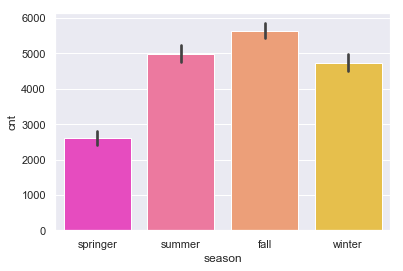

In [141]:
sns.barplot(x='season', y='cnt', palette = 'spring',  data = br_day_subset)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


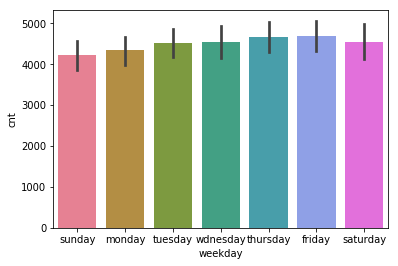

In [15]:
sns.barplot(x='weekday', y='cnt', palette = 'husl', data = br_day_subset,order=['sunday','monday','tuesday','wdnesday',
                                                                                'thursday', 'friday','saturday'])

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


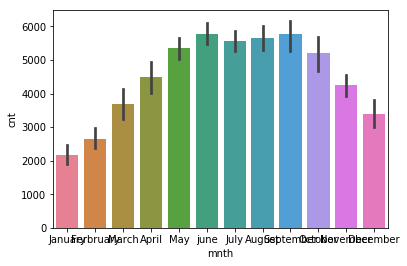

In [14]:
sns.barplot(x='mnth', y='cnt', palette = 'husl', data = br_day_subset)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


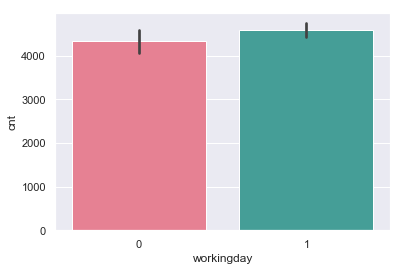

In [695]:
sns.barplot(x='workingday', y='cnt', palette = 'husl', data = br_day_subset)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


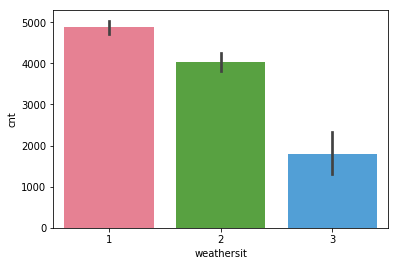

In [13]:
sns.barplot(x='weathersit', y='cnt', palette = 'husl', data = br_day_subset)